In [20]:
import pandas as pd
import numpy as np
import boto
import matplotlib.pyplot as plt

# import the csv file directly from an s3 bucket
data = pd.read_csv('https://raw.githubusercontent.com/hlinh96it/implement_algorithm/main/Regression_Algorithms/meats.csv')
data = data.drop('Unnamed: 0', axis = 1)
data

,x_001,x_002,x_003,x_004,x_005,x_006,x_007,x_008,x_009,x_010,...,x_094,x_095,x_096,x_097,x_098,x_099,x_100,water,fat,protein
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,60.5,22.5,16.7
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,46.0,40.1,13.5
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,71.0,8.4,20.5
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,72.8,5.9,20.7
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,58.3,25.5,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,3.14626,3.15166,3.15703,3.16244,3.16791,3.17348,3.17923,3.18521,3.19140,3.19792,...,3.57915,3.56142,3.54365,3.52563,3.50705,3.48765,3.46769,53.4,31.3,15.3
211,2.57992,2.58040,2.58099,2.58175,2.58266,2.58381,2.58530,2.58719,2.58949,2.59225,...,2.92062,2.90367,2.88668,2.86951,2.85180,2.83347,2.81473,51.6,33.8,13.8
212,2.56875,2.56923,2.56985,2.57060,2.57150,2.57268,2.57420,2.57610,2.57841,2.58129,...,2.91592,2.89952,2.88291,2.86595,2.84836,2.82998,2.81111,50.3,35.5,13.2
213,2.65884,2.65943,2.66023,2.66108,2.66215,2.66360,2.66550,2.66787,2.67070,2.67405,...,3.01851,3.00327,2.98759,2.97121,2.95374,2.93514,2.91564,44.9,42.5,12.0


In [11]:
# Split data in train, val, test
meats_train = data.iloc[0:130,:]
meats_val = data.iloc[130:175,:]
meats_test = data.iloc[175:215,:]

# Split the columns in X and Y
X_colnames = data.columns[:-3]
Y_colnames = data.columns[-3:]

# Split each train, val and test into two arrays
X_train = meats_train[X_colnames].values
y_train = meats_train[Y_colnames].values

X_val = meats_val[X_colnames].values
y_val = meats_val[Y_colnames].values

X_test = meats_test[X_colnames].values
y_test = meats_test[Y_colnames].values

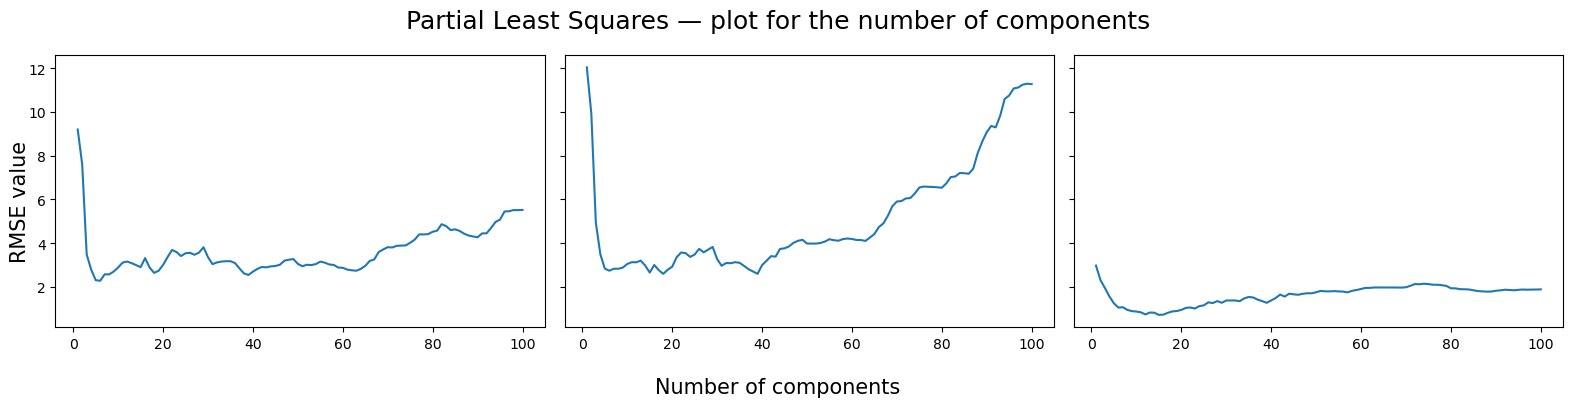

In [23]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

water, fat, protein = [], [], []
for n_comp in range(1, 101):
    my_plsr = PLSRegression(n_components=n_comp, scale=True)
    my_plsr.fit(X_train, y_train)
    preds = my_plsr.predict(X_val)

    water.append(np.sqrt(mean_squared_error(y_val[:, 0], preds[:, 0])))
    fat.append(np.sqrt(mean_squared_error(y_val[:, 1], preds[:, 1])))
    protein.append(np.sqrt(mean_squared_error(y_val[:, 2], preds[:, 2])))

fig, ax = plt.subplots(nrows=1, ncols=3, sharex='all', sharey='all', figsize=(16, 4))
ax[0].plot(range(1, 101), water)
ax[1].plot(range(1, 101), fat)
ax[2].plot(range(1, 101), protein)

plt.suptitle('Partial Least Squares — plot for the number of components', fontsize=18)
fig.supxlabel('Number of components', fontsize=15)
fig.supylabel('RMSE value', fontsize=15)
plt.tight_layout()
plt.savefig('pls_comps.png', dpi=150)
plt.show()